#¿Comprar casa o Alquilar?


Las columnas que tenemos son:

- **ingresos:** los ingresos de la familia mensual
- **gastos comunes:** pagos de luz, agua, gas, etc mensual
- **pago coche:** si se está pagando cuota por uno o más coches, y los gastos en combustible, etc al mes.
- **gastos_otros:** compra en supermercado y lo necesario para vivir al mes
- **ahorros:** suma de ahorros dispuestos a usar para la compra de la casa.
- **vivienda:** precio de la vivienda que quiere comprar esa familia
- **estado civil:**
```
     0-soltero
     1-casados
     2-divorciados
```


- **hijos:** cantidad de hijos menores y que no trabajan.
- **trabajo:**
```
     0-sin empleo 1-autónomo (freelance)
     2-empleado
     3-empresario
     4-pareja: autónomos
     5-pareja: empleados
     6-pareja: autónomo y asalariado
     7-pareja:empresario y autónomo
     8-pareja: empresarios los dos o empresario y empleado
```
- **comprar:** 0-No comprar 1-Comprar (esta será nuestra columna de salida, para aprender)

Algunos supuestos para el problema formulado:

1.   Está pensado en Euros pero podría ser cualquier otra moneda
2.   No tiene en cuenta ubicación geográfica, cuando sabemos que dependerá mucho los precios de los inmuebles de distintas zonas
3.   Se supone una hipoteca fija a 30 años con interés de mercado “bajo”.

**Objetivo:** Con esta información, queremos que el algoritmo aprenda y que como resultado podamos consultar nueva información y nos dé una decisión sobre comprar (1) o alquilar (0) casa.

In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#cargamos los datos de entrada
df = pd.read_csv("comprar_alquilar.csv")
df.head(3)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1


In [3]:
df.tail(2)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


In [8]:
df.shape

(202, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [4]:
#normalizamos los datos
scaler=StandardScaler()
df_pca = df.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df_pca) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df_pca)# Ahora si, escalo los datos y los normalizo

In [5]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9,random_state=123) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [6]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada

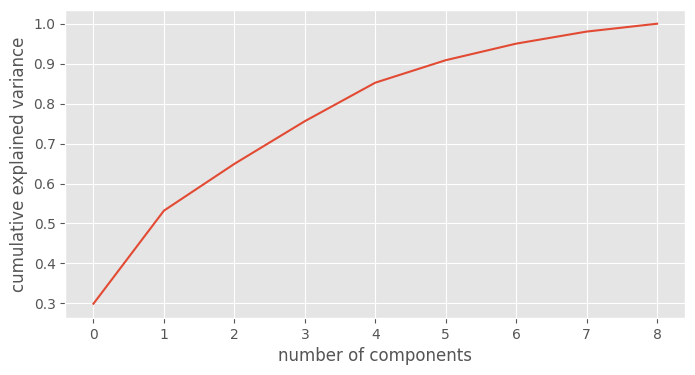

In [10]:
plt.figure(figsize=(8,4))
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

<Figure size 800x400 with 0 Axes>

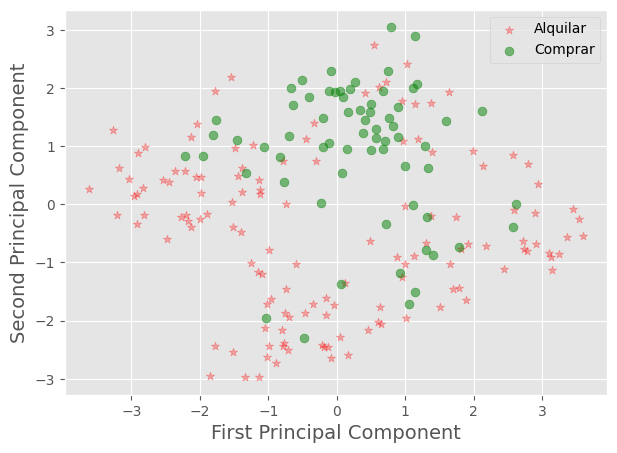

In [11]:
plt.figure(figsize=(8,4))
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=df['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

In [12]:
# obteniendo los coeficientes de los componentes principales
coef = pca.components_
print(coef)

[[ 4.93720326e-01  3.18228652e-01 -1.23770585e-01 -1.11875722e-01
   4.44650306e-01  4.62608605e-01 -2.52278902e-01 -2.59858682e-01
  -2.90247540e-01]
 [ 3.06958523e-01  1.47372634e-01 -9.16409584e-02  1.11593405e-04
   2.88434882e-01  1.48984886e-01  4.69043960e-01  5.21893872e-01
   5.27155638e-01]
 [-9.14192492e-02 -3.63453156e-01 -5.16144106e-01  7.01985912e-01
   1.91767355e-01  1.40513292e-01 -1.72884784e-01  1.12183561e-01
  -3.69101842e-02]
 [ 1.11222044e-01  8.16296251e-02  7.80267686e-01  5.90704378e-01
   2.28391302e-02  1.50085403e-01 -7.66309571e-03  7.40404830e-03
  -7.49271067e-03]
 [ 8.88965452e-02  7.63005855e-01 -2.65553621e-01  3.30743735e-01
  -2.89002223e-01 -3.65555555e-01 -1.04638865e-01  4.36678973e-02
   8.65473020e-06]
 [-7.54772584e-02  6.79027972e-02 -1.53696523e-01  1.54422329e-01
  -2.30180519e-01  2.90798556e-01  7.67069963e-01 -3.87963615e-01
  -2.56445999e-01]
 [-1.54318903e-01  1.05597504e-01 -2.73330932e-02 -1.01876185e-01
  -5.24583921e-01  6.4103363

In [13]:
# ordenando los coeficientes de cada componente principal
sorted_coef_indices = np.argsort(coef, axis=1)
print(sorted_coef_indices)

[[8 7 6 2 3 1 4 5 0]
 [2 3 1 5 4 0 6 7 8]
 [2 1 6 0 8 7 5 4 3]
 [6 8 7 4 1 0 5 3 2]
 [5 4 2 6 8 7 0 3 1]
 [7 8 4 2 0 1 3 5 6]
 [4 6 0 8 3 2 1 7 5]
 [7 4 6 2 0 1 3 5 8]
 [4 1 5 8 2 6 7 3 0]]


In [14]:
sorted_coef_indices[0 , -3:]

array([4, 5, 0])

In [15]:
n_top_features = 2 # Numero de caracteristicas que vamos a mostrar
n_components = 5 # Numero de componentes que hemos utilizado
feature_names = pd.DataFrame(list(df_pca.columns),columns=['Nombre de la característica']) # Creación de nombre de variables
signs = np.sign( coef )

#Imprimier las caracteristicas mas importantes

for i in range(n_components):
  print(f"Caracteristicas mas importantes para el componente {i+1}")
  # Get the indices of top features for the current component, but limit it to the available features
  indices_top_features = sorted_coef_indices[i, -n_top_features:]
  # Make sure indices are within the valid range
  indices_top_features = [idx for idx in indices_top_features if idx < len(feature_names)]
  for j in indices_top_features:
    print(f"{feature_names.iloc[j]   , signs[i][j] }" ) # Use .iloc to access row by index
  print()

Caracteristicas mas importantes para el componente 1
(Nombre de la característica    vivienda
Name: 5, dtype: object, 1.0)
(Nombre de la característica    ingresos
Name: 0, dtype: object, 1.0)

Caracteristicas mas importantes para el componente 2
(Nombre de la característica    hijos
Name: 7, dtype: object, 1.0)
(Nombre de la característica    trabajo
Name: 8, dtype: object, 1.0)

Caracteristicas mas importantes para el componente 3
(Nombre de la característica    ahorros
Name: 4, dtype: object, 1.0)
(Nombre de la característica    gastos_otros
Name: 3, dtype: object, 1.0)

Caracteristicas mas importantes para el componente 4
(Nombre de la característica    gastos_otros
Name: 3, dtype: object, 1.0)
(Nombre de la característica    pago_coche
Name: 2, dtype: object, 1.0)

Caracteristicas mas importantes para el componente 5
(Nombre de la característica    gastos_otros
Name: 3, dtype: object, 1.0)
(Nombre de la característica    gastos_comunes
Name: 1, dtype: object, 1.0)



In [16]:
X_pca.shape

(202, 9)

<Figure size 800x400 with 0 Axes>

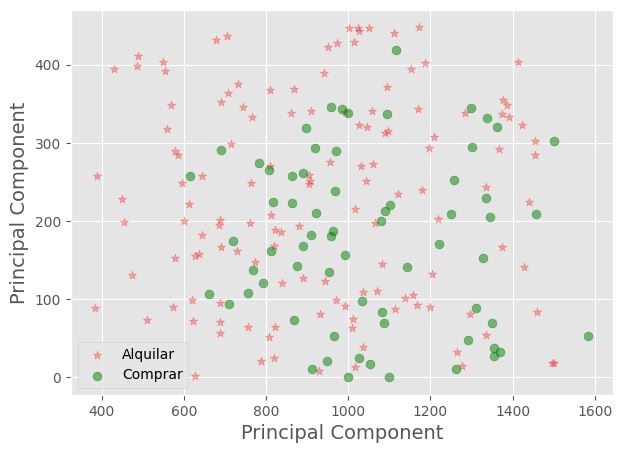

In [17]:
plt.figure(figsize=(8,4))
#graficamos en 2 Dimensiones
Xax=np.array(df['gastos_comunes']) #X_pca[:,0]
Yax=np.array(df['pago_coche'])
labels=df['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("Principal Component",fontsize=14)
plt.ylabel("Principal Component",fontsize=14)
plt.legend()
plt.show()